In [61]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

import imutils

import math
import time

In [62]:
filePath = '../imageTest/contrast06.jpg'

clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))

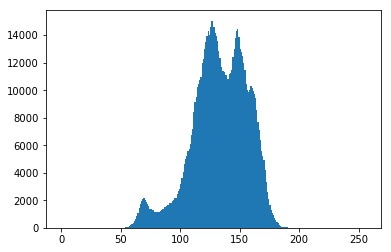

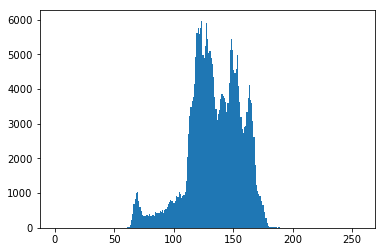

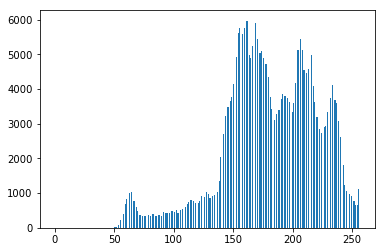

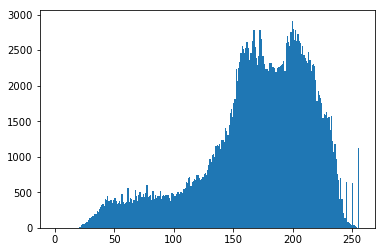

In [63]:
img = cv2.imread(filePath)
cv2.imshow('original', img)
plt.hist(img.ravel(),256,[0,256])
plt.show()

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', imgGray)
plt.hist(imgGray.ravel(),256,[0,256])
plt.show()

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgGray)
imgCon = imgGray.copy()
cv2.convertScaleAbs(imgGray, imgCon, 255 / (max_val - min_val), -1 * min_val)
cv2.imshow('convert', imgCon)
plt.hist(imgCon.ravel(),256,[0,256])
plt.show()
#imgCon = imgGray.copy()
#cv2.equalizeHist(imgCon)
#cv2.imshow('convert', imgCon)

imgClahe = clahe.apply(imgCon)
cv2.imshow('clahe', imgClahe)
plt.hist(imgClahe.ravel(),256,[0,256])
plt.show()

In [64]:
while(True):
    getKey = cv2.waitKey(10) & 0xFF
    if getKey is ord('q'):
        cv2.destroyAllWindows()
        break
    if getKey is ord('s'):
        fileName = "../imageCapture/gray" + time.strftime("%Y-%m-%d_%H%M%S-", time.localtime()) + '.png'
        cv2.imwrite(fileName, imgGray, [int(cv2.IMWRITE_PNG_COMPRESSION), 0])
        fileName = "../imageCapture/conv" + time.strftime("%Y-%m-%d_%H%M%S-", time.localtime()) + '.png'
        cv2.imwrite(fileName, imgCon, [int(cv2.IMWRITE_PNG_COMPRESSION), 0])
        fileName = "../imageCapture/clahe" + time.strftime("%Y-%m-%d_%H%M%S-", time.localtime()) + '.png'
        cv2.imwrite(fileName, imgClahe, [int(cv2.IMWRITE_PNG_COMPRESSION), 0])